# ETLYAK DAS Beamforming


In [259]:
import DAS_tools.delay_and_sum as das
import DAS_tools.room_map as room
import matplotlib.pyplot as plt
import soundfile as sf
import sounddevice as sd
import numpy as np
%load_ext autoreload
%autoreload 2

plt.style.use("seaborn-colorblind")
plt.style.use("arh")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [260]:
# sted = "lytterum"
sted = "anechoic"
type = "talk"
# type = "sine"

In [261]:
path = f"audio/{sted}/{type}_seperated/"

In [265]:
N = 3
spacing = 0.4
if sted == "lytterum":
    mic_inputs, fs = das.load_inputs(path + "input","")
    speaker0 = das.speaker(-1.1, 1.6, 0)
    speaker1 = das.speaker(1, 2, 0)
else:
    mic_inputs_L, fs = das.load_inputs(path + "input", "_L")
    mic_inputs_R, fs = das.load_inputs(path + "input", "_R")
    if N != 5:
        mic_inputs_L = mic_inputs_L[0:5:2]
        mic_inputs_R = mic_inputs_R[0:5:2]
        mic_inputs_superpos = np.sum([mic_inputs_L, mic_inputs_R], axis=0)
    else:
        mic_inputs_superpos = np.sum([mic_inputs_L, mic_inputs_R], axis=0)
    speaker0 = das.speaker(-1.1, 2.95, 0)
    speaker1 = das.speaker(0.95, 2.5, 0)
# mic_inputs_ref, fs = das.load_inputs(path, "_ref")
mic_array = das.microphone_array(spacing, N)
## LYTTERUM
## LYDDØDT
print(mic_inputs_superpos.shape)

(3, 542119)


In [266]:
# lytterum = room.view_placements(mic_array, speaker0, speaker1)
# lytterum.savefig(f"{N}_{sted}_placeringer.eps")


The source is placed to the left of the array.
Mic:		[0.8 0.  0. ]
angle: [76.65166037]
extra distance:[0.18469657]m
extra time:[0.53800341]ms
sample_diff:	[25.82416358]samples

Mic:		[0.4 0.  0. ]
angle: [69.54765422]
extra distance:[0.13977128]m
extra time:[0.40714035]ms
sample_diff:	[19.54273697]samples

Mic:		[0. 0. 0.]
angle: [63.04380492]
extra distance:[0.]m
extra time:[0.]ms
sample_diff:	[0.]samples

The source is placed to the right of the array.
Mic:		[0. 0. 0.]
angle: [-61.62861737]
extra distance:[0.]m
extra time:[0.]ms
sample_diff:	[0.]samples

Mic:		[0.4 0.  0. ]
angle: [-69.1898232]
extra distance:[0.1421092]m
extra time:[0.41395048]ms
sample_diff:	[19.86962303]samples

Mic:		[0.8 0.  0. ]
angle: [-77.59363937]
extra distance:[0.171875]m
extra time:[0.5006554]ms
sample_diff:	[24.03145936]samples

The source is placed to the left of the array.
Mic:		[0.8 0.  0. ]
angle: [76.65166037]
extra distance:[0.18469657]m
extra time:[0.53800341]ms
sample_diff:	[25.82416358]samples


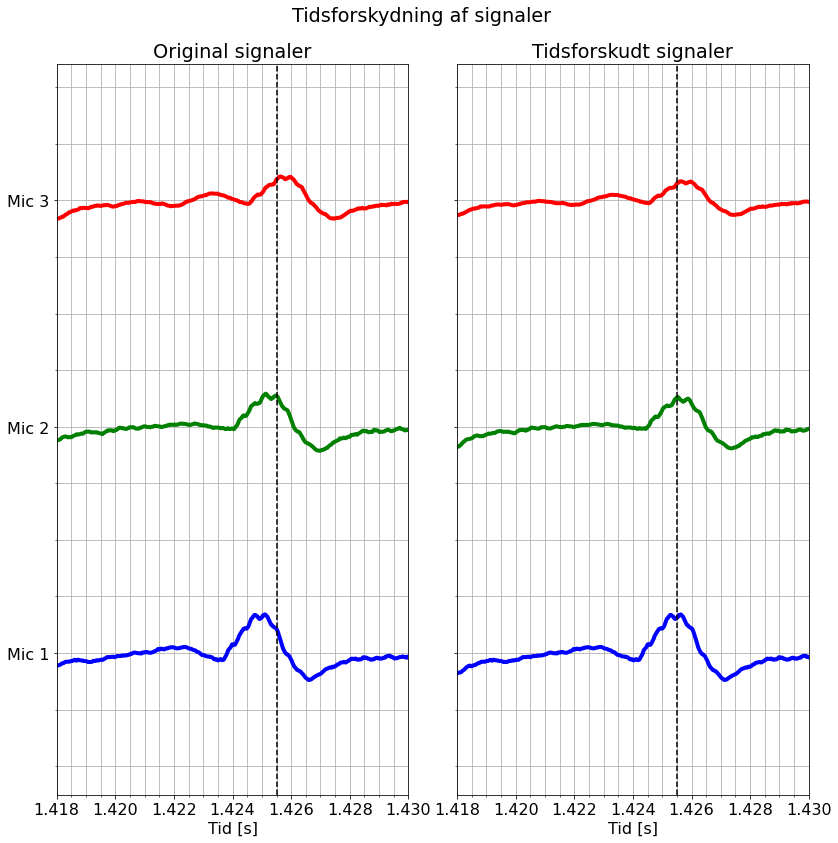

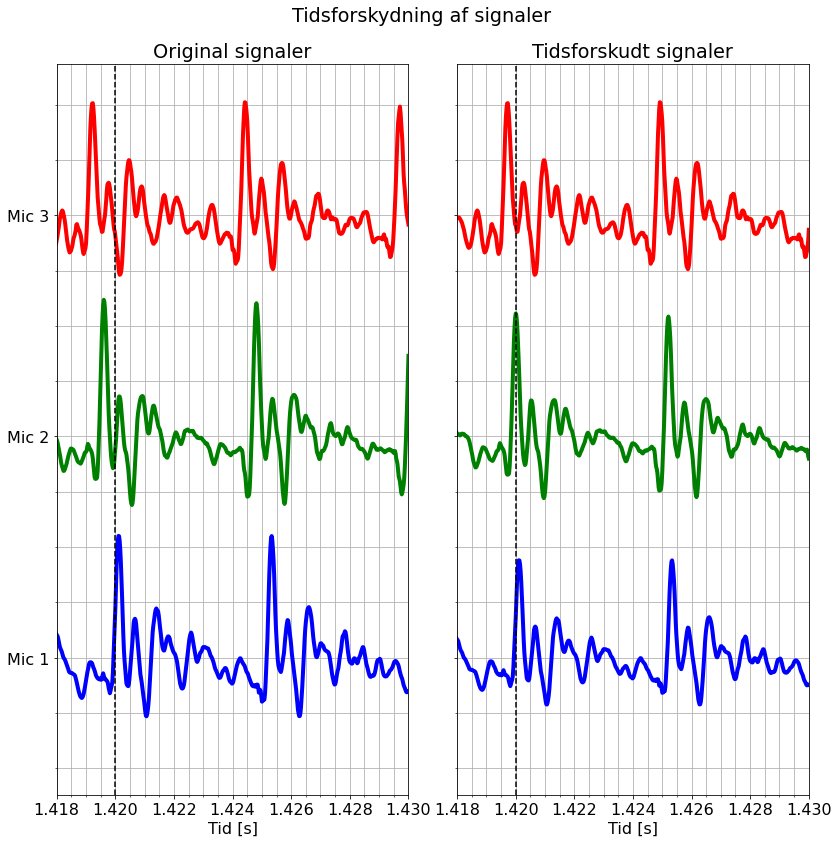

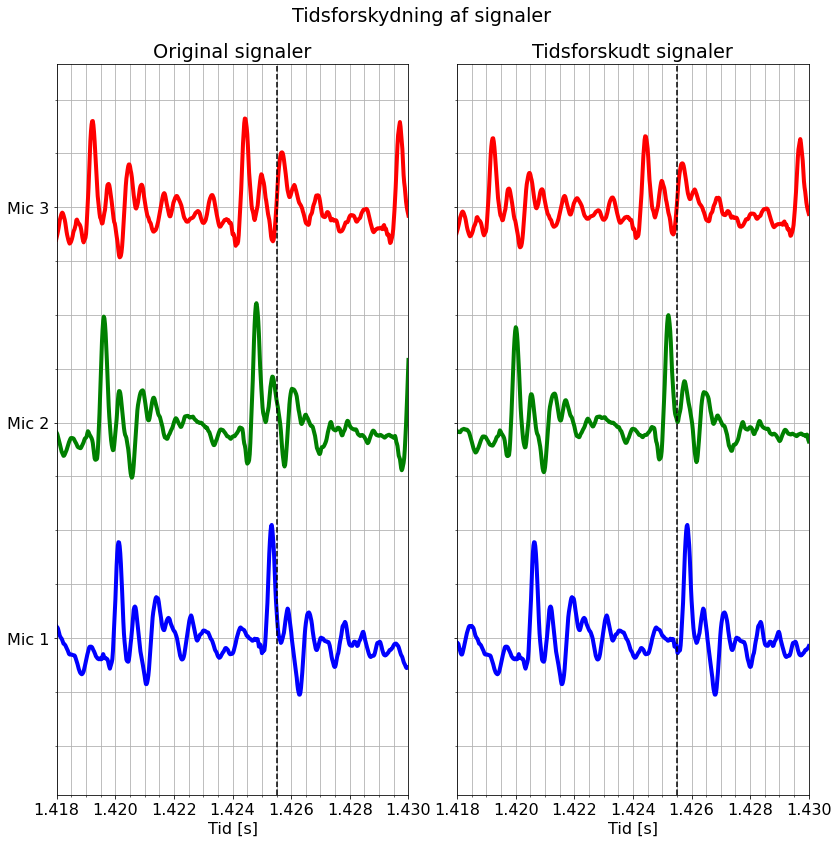

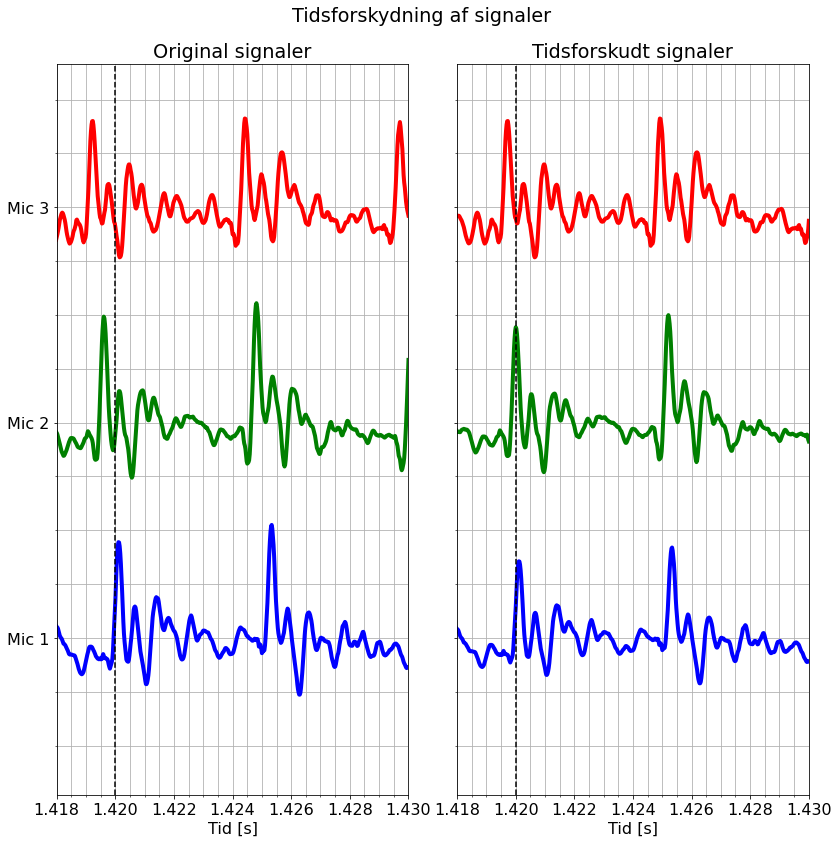

In [270]:
if sted == "lytterum":
    shifted_steer_left = das.shift_viewer(
        mic_inputs, mic_array, speaker0, filename=f"{sted}_{type}_{N}_shift_L"
    )
    shifted_steer_right = das.shift_viewer(
        mic_inputs, mic_array, speaker1, filename=f"{sted}_{type}_{N}shift_R"
    )
else:
    shifted_solo_steer_left = das.shift_viewer(
        mic_inputs_L,
        mic_array,
        speaker0,
        start=2.005,
        stop=2.01,
        axv=2.007,
        filename=f"{N}_{sted}_{type}_DAS_steer_right_solo",
    )
    shifted_solo_steer_right = das.shift_viewer(
        mic_inputs_R,
        mic_array,
        speaker1,
        start=6.005,
        stop=6.01,
        axv=6.007,
        filename=f"{N}_{sted}_{type}_DAS_steer_right_solo",
    )
    shifted_steer_left = das.shift_viewer(
        mic_inputs_superpos,
        mic_array,
        speaker0,
        start=2.005,
        stop=2.01,
        axv=2.007,
    )
    shifted_steer_right = das.shift_viewer(
        mic_inputs_superpos,
        mic_array,
        speaker1,
        start=6.005,
        stop=6.01,
        axv=6.007,
    )


In [271]:
cutoff = 400
if sted == "lytterum":
    steer_left = das.sound_sum(shifted_steer_left, cutoff)
    steer_right = das.sound_sum(shifted_steer_right, cutoff)
    non_steer = das.sound_sum(mic_inputs, cutoff)
else:
    solo_steer_left = das.sound_sum(shifted_solo_steer_left, cutoff)
    solo_steer_right = das.sound_sum(shifted_solo_steer_right, cutoff)
    steer_left = das.sound_sum(shifted_steer_left, cutoff)
    steer_right = das.sound_sum(shifted_steer_right, cutoff)
    non_steer = das.sound_sum(mic_inputs_superpos, cutoff)
    solo_non_steer_L = das.sound_sum(mic_inputs_L, cutoff)
    solo_non_steer_R = das.sound_sum(mic_inputs_R, cutoff)


In [272]:
if sted == "lytterum":
    sf.write(f"{path}steer_left.wav", steer_left, fs)
    sf.write(f"{path}steer_right.wav", steer_right, fs)
    sf.write(f"{path}non_steer.wav", non_steer, fs)

else:
    sf.write(f"{path}_{N}_solo_steer_left.wav", solo_steer_left, fs)
    sf.write(f"{path}_{N}_solo_steer_right.wav", solo_steer_right, fs)
    sf.write(f"{path}_{N}_steer_left.wav", steer_left, fs)
    sf.write(f"{path}_{N}_steer_right.wav", steer_right, fs)
    sf.write(f"{path}_{N}_non_steer.wav", non_steer, fs)
    sf.write(f"{path}_{N}_solo_non_steer_L.wav", solo_non_steer_L, fs)
    sf.write(f"{path}_{N}_solo_non_steer_r.wav", solo_non_steer_R, fs)


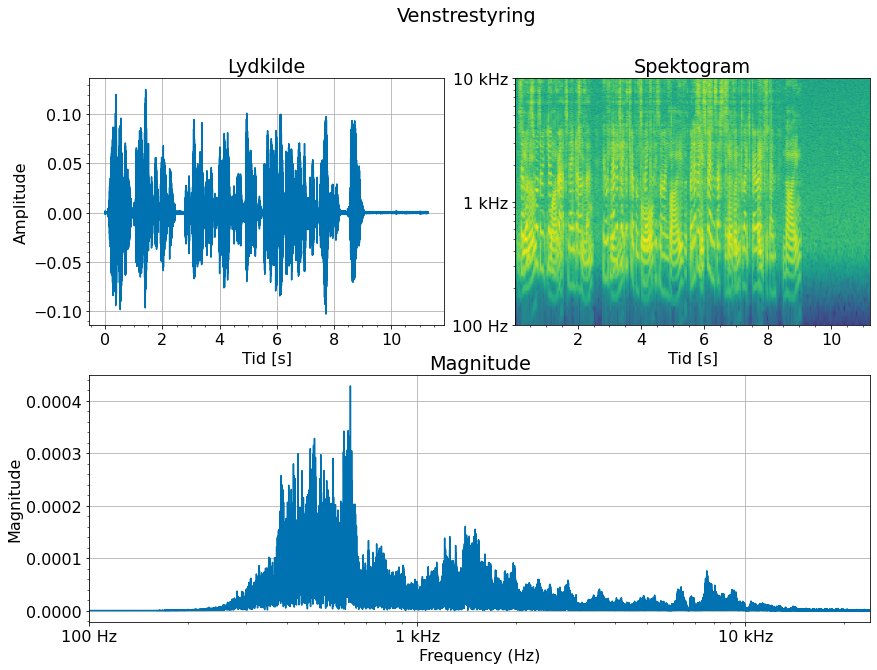

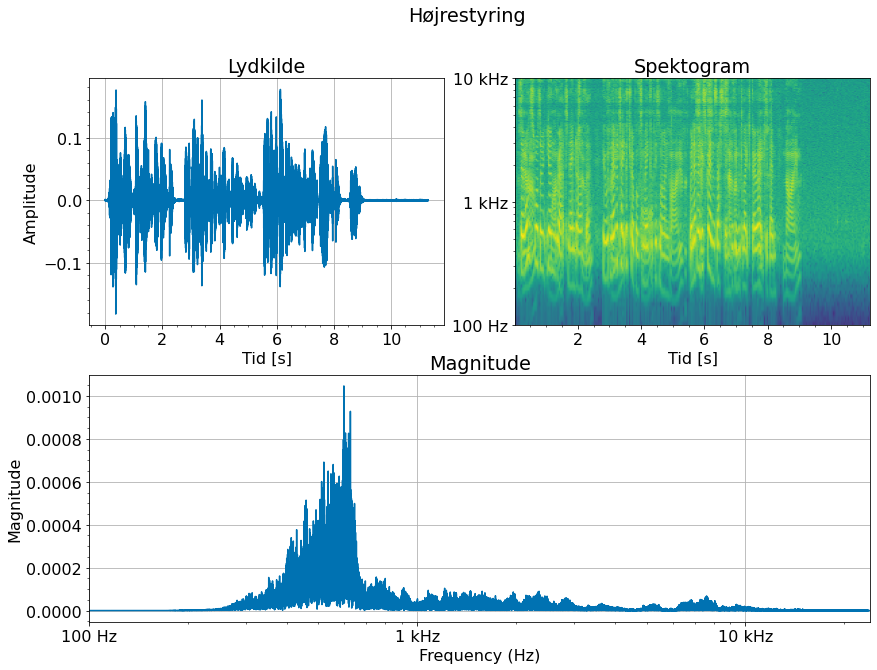

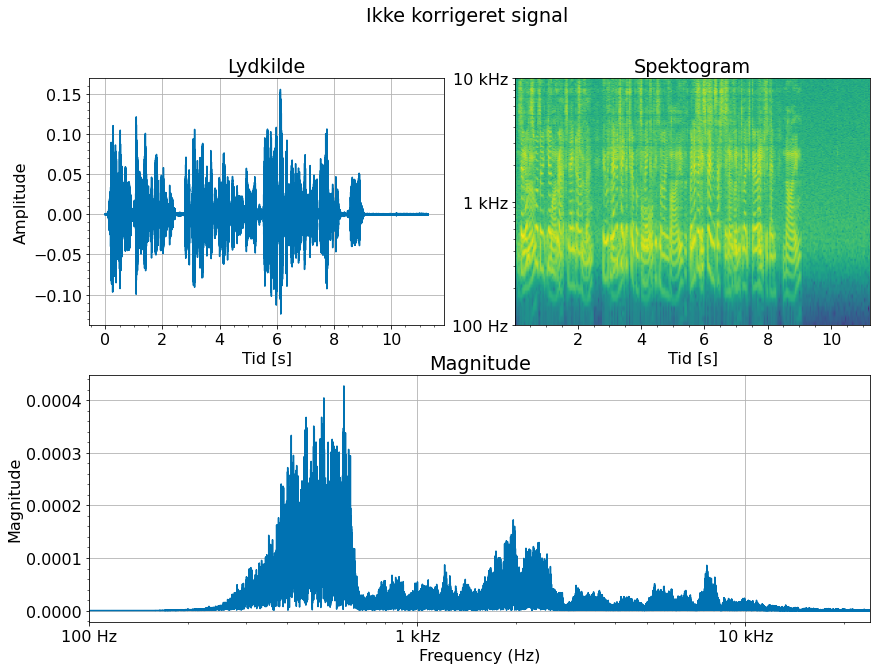

In [273]:
das.source_viewer(steer_left, fs, title="Venstrestyring",filename=f"{N}_{sted}_{type}_steer_left")
das.source_viewer(steer_right, fs, title="Højrestyring",filename=f"{N}_{sted}_{type}_steer_right")
das.source_viewer(non_steer, fs, title="Ikke korrigeret signal",filename=f"{N}_{sted}_{type}_non_steer")
